In [1]:
from screenTools import *

In [5]:
r = importPlates('./data/CMR_replicate_screen/220316_replicate1_cmr.xlsx', [1, 1, 2, 2], ["104", "86", "104", "86"])
r.head()

,row,column,value,plate_number,peptide
0,A,1,79078,1,104
1,A,2,41377,1,104
2,A,3,71462,1,104
3,A,4,15018,1,104
4,A,5,87901,1,104


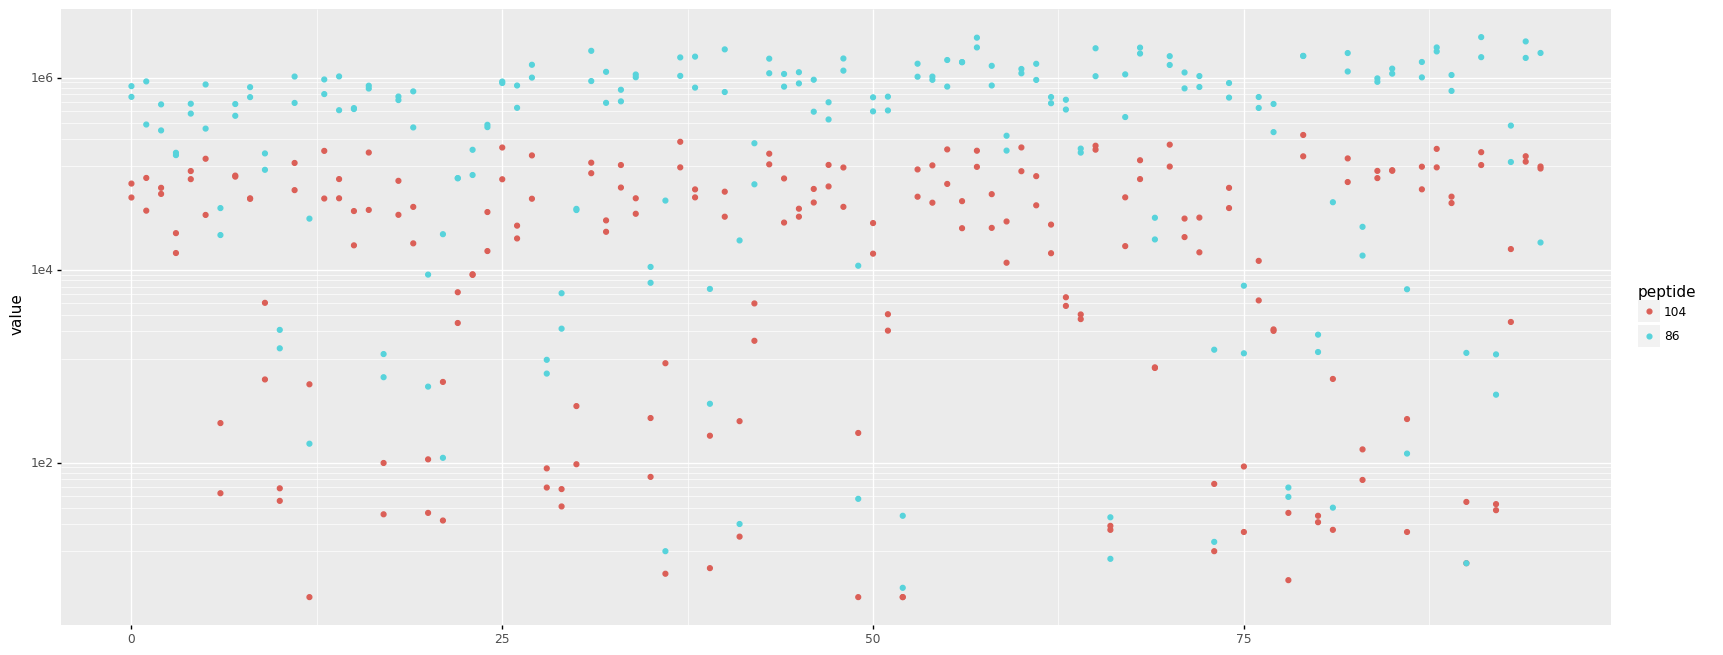

<ggplot: (8765577284581)>

In [20]:
import plotnine as pn

pn.options.figure_size = (20,8)

(
    pn.ggplot(r, pn.aes(x=r.index, y='value', color='peptide'))+
    pn.geom_point()+
    pn.scale_y_log10()
)

In [30]:
r_byplate = pd.concat([
    r[r['plate_number']==1]['value'],
    r[r['plate_number']==2][['value', 'peptide']]
], axis=1, keys=['plate1', 'plate2'])

r_byplate['plate1', 'value']

0       79078
1       41377
2       71462
3       15018
4       87901
       ...   
91    2627221
92       1330
93     316466
94    2370560
95    1798938
Name: (plate1, value), Length: 192, dtype: int64

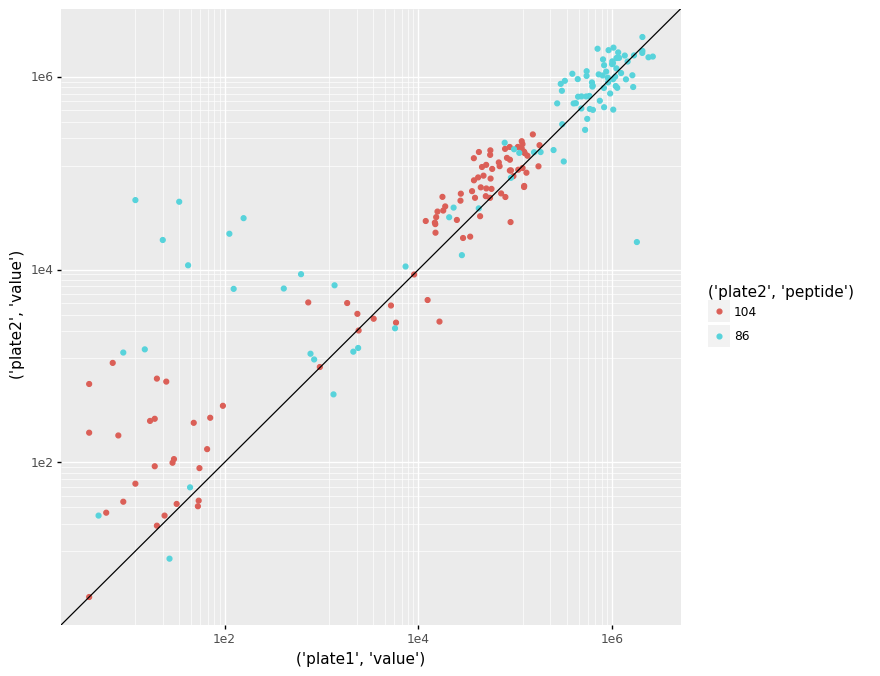

<ggplot: (8765561214663)>

In [36]:
pn.options.figure_size = (8,8)

(
    pn.ggplot(r_byplate, pn.aes(x=r_byplate['plate1', 'value'], y=r_byplate['plate2', 'value'], color=r_byplate['plate2', 'peptide']))
    +pn.geom_point()
    +pn.scale_y_log10()
    +pn.geom_abline(intercept=0, slope=1)
    +pn.scale_x_log10()
)

Looks like plate 1 was sometimes dimmer than plate 2, mostly with deviations in 86 light emission. Not sure why 86 would vary more than 104? Plate 2 might be slightly brighter overall. This could be accounted for by the fact that this is where the toothpick sat for the longest period? Does this also explain the bias in Abby's data with this regard?